In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [2]:
dm = 1/1000
hfact = 1.2

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/toy_star.csv')
sdf_ini.params={'mass':dm, 'hfact':hfact}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,u,rho
0,-0.545853,-0.358428,0.060610,0,0,0,0.014508,0,565.884242
1,-0.019900,-0.089172,0.128558,0,0,0,0.014508,0,565.884242
2,-0.028214,0.081889,-0.688266,0,0,0,0.014508,0,565.884242
3,-0.300558,0.026892,-0.472094,0,0,0,0.014508,0,565.884242
4,0.038164,-0.557702,-0.009428,0,0,0,0.014508,0,565.884242
...,...,...,...,...,...,...,...,...,...
995,0.208194,-0.060404,-0.240565,0,0,0,0.014508,0,565.884242
996,0.639992,-0.239642,0.238841,0,0,0,0.014508,0,565.884242
997,-0.125684,-0.133795,0.635685,0,0,0,0.014508,0,565.884242
998,-0.313519,-0.439521,0.408774,0,0,0,0.014508,0,565.884242


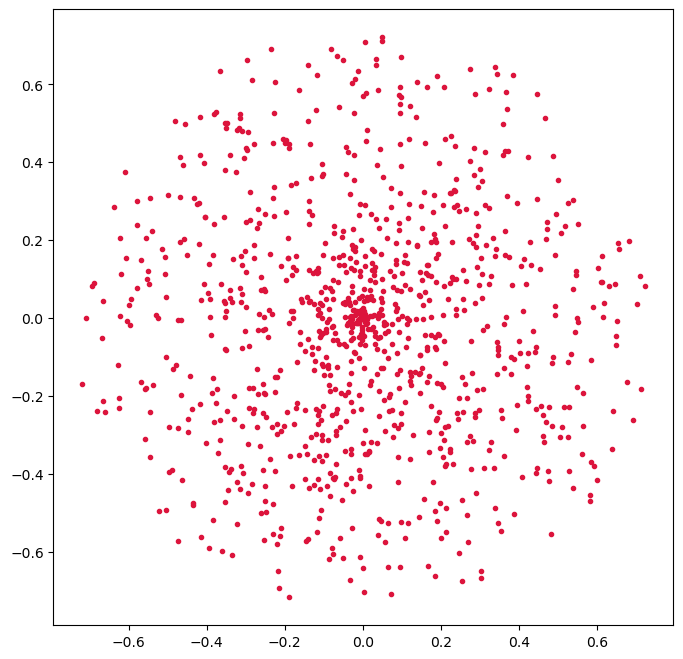

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
plt.show()

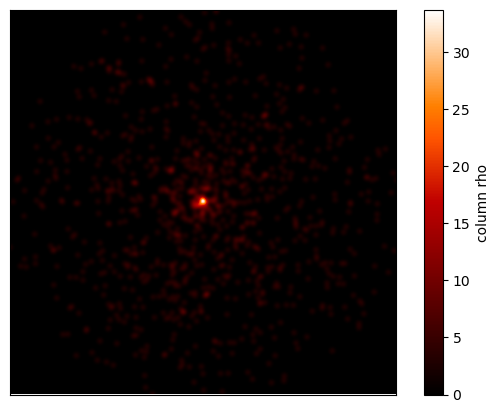

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', ax=ax, rotation=[0,0,0])

In [28]:
sdf = src.read_csv('../Data/results/toy_star/10.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.229932,-0.143864,0.030619,-0.936524,-0.577376,0.125342,0.064299,1.485723,6.500340
1,-0.010832,-0.020495,0.028598,-0.043933,-0.015141,0.160866,0.048541,1.584569,15.108434
2,-0.069627,0.151677,-0.170898,-0.210662,0.876064,-0.571206,0.061353,1.297666,7.482488
3,-0.135164,0.037910,-0.101602,-0.572393,0.145648,-0.331386,0.053161,1.264845,11.501964
4,0.011700,-0.233429,-0.027633,0.096475,-1.049334,-0.159045,0.060569,1.392911,7.776487
...,...,...,...,...,...,...,...,...,...
995,0.099713,-0.040481,-0.034478,0.415649,-0.105674,-0.196306,0.050394,1.527359,13.502466
996,0.287696,-0.060990,0.047632,1.342544,-0.294296,0.179971,0.072869,1.540874,4.465919
997,-0.086711,-0.068970,0.194931,-0.382534,-0.388804,0.989954,0.059411,1.391991,8.240503
998,-0.159732,-0.184688,0.107953,-0.696325,-0.928083,0.429293,0.065229,1.404659,6.226270


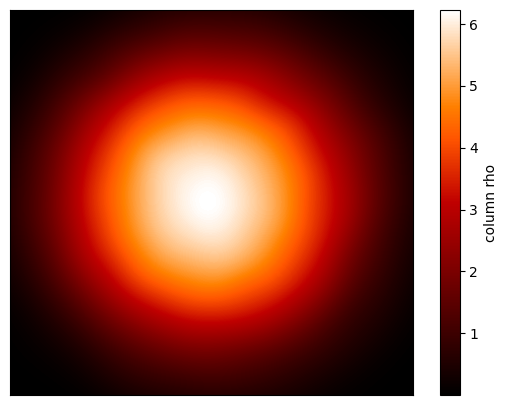

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

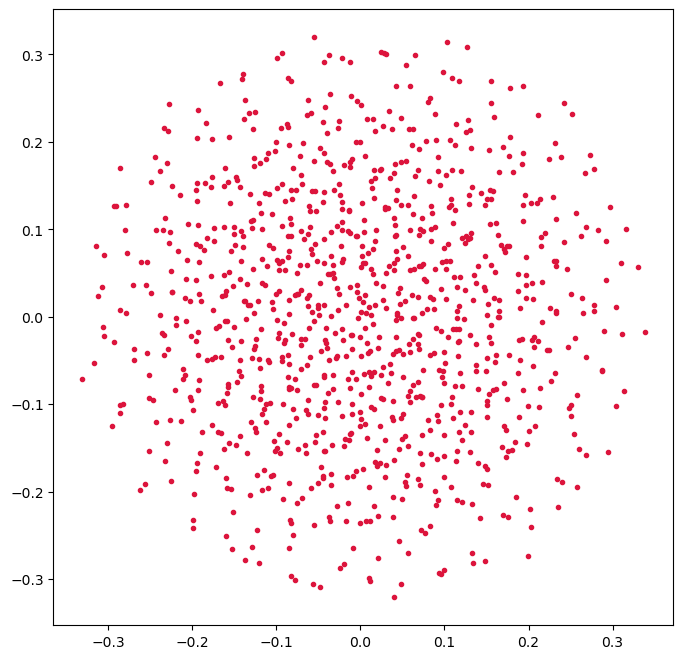

In [29]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [8]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [9]:
R = 0.75
k = 0.05
M = 2.0
n = 1.0
gamma = 2.0
#lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M
lmbda = 4.*k/np.pi**(1.5) * (3.32335 * M/(R*R*R))/(R*R);

In [10]:
4./3.*np.pi*R**3. *sum(sdf['rho'])

10965.805909163977

In [17]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

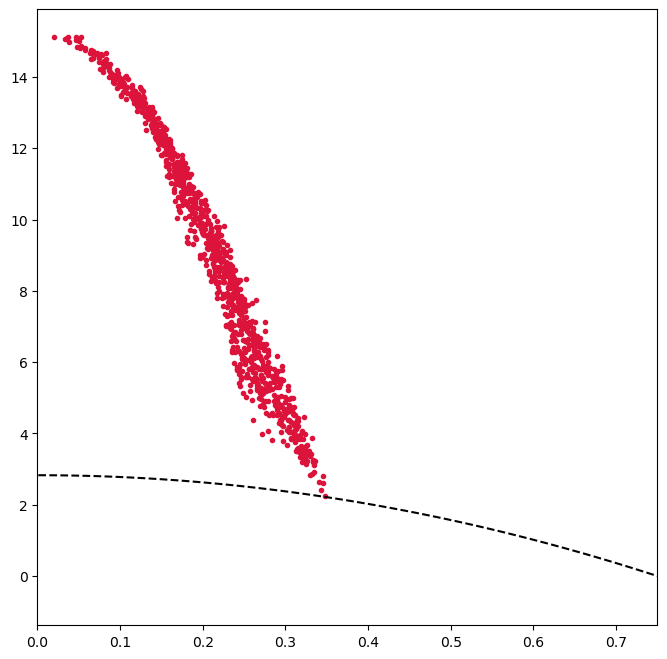

In [30]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2+sdf['z']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.xlim(0., R)
plt.show()